## Import Libraries

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

## Import Dataset

In [4]:
data = pd.read_csv("spam.csv", encoding = "latin1")
df = pd.DataFrame(data)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Remove nan cols

In [5]:
df = df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Make numerical labels

In [7]:
df['spam'] = df['label'].apply( lambda x: 1 if x == 'spam' else 0)
df

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

### Get SBERT Model

In [9]:
model = SentenceTransformer("all-MiniLM-L6-v2")

### X and y lables

In [10]:
enc_start = time.time()
X = model.encode(df['text'].tolist())
enc_end = time.time() - enc_start
y = df['spam'].values
print("Encoding time in sec: ",enc_end)

Encoding time in sec:  78.50880169868469


### Make and fit classification model(SVM) and use the embeddings

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(df['spam'].value_counts())

spam
0    4825
1     747
Name: count, dtype: int64


In [13]:
classifier = SVC()

In [14]:
train_start = time.time()
classifier.fit(X_train_smote, y_train_smote)
train_end = time.time() - train_start
print("Training time in sec: ",train_end)

Training time in sec:  2.7844550609588623


In [15]:
pred_start = time.time()
y_pred = classifier.predict(X_test)
pred_end = time.time() - pred_start
print("prediction time in sec: ",pred_end)

prediction time in sec:  0.6003994941711426


### Accuracy

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9901345291479821


### Confusion Matrix

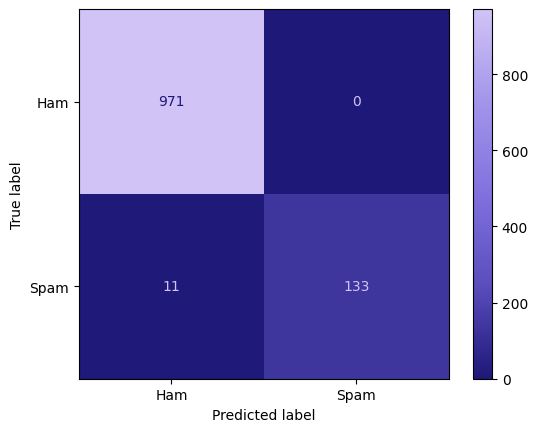

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with better contrast
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#1e1878", "#5a4dbc", "#8071de", "#a295ea", "#d1c3f6"], N=256)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with improved contrast
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=custom_cmap)

plt.show()


### Predict new text

In [18]:
new_text = [
    "Heyyyyyy..... are u free now?", #ham
    "Congratulate me! I won the freefire match!", #ham
    "Congratulations! Click this link for free sony tv", #spam
    "Click this link to win free sony tv!",  #spam
    "Call this number for free sony tv!", #spam
    "Click this link for free sony tv! URL: https://wintvzone//.com", #spam
    "Click this link for free Sony tv!" #spam
    "Click this link for free tv!" #spam
]

In [19]:
new_embeddings = model.encode(new_text)
new_embeddings.shape

(7, 384)

In [20]:
new_pred = classifier.predict(new_embeddings)
new_pred

array([0, 1, 1, 1, 1, 1, 1], dtype=int64)

### Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       971
           1       1.00      0.92      0.96       144

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### Get models as pkl files

In [28]:
import pickle

In [29]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [30]:
classifier

SVC()

In [31]:
with open("svm_model.pkl", "wb") as f:
    pickle.dump(classifier, f)

In [38]:
with open("enc_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
import os
print("SVM model exists:", os.path.exists("svm_model.pkl"))
print("SBERT model folder exists:", os.path.exists("enc_model.pkl"))

SVM model exists: True
SBERT model folder exists: True
